In [1]:
from datamarket import *
import time

In [16]:
df = pd.DataFrame({'A': range(1, 5), 'B': range(11, 15)})

In [17]:
name = "bad"
df = df.assign(c =df['A'])
df = df.assign(name=df['B'] / df['A'] )
df

,A,B,c,name
0,1,11,1,11.000000
1,2,12,2,6.000000
2,3,13,3,4.333333
3,4,14,4,3.500000


1647922739.6960444


In [3]:
# read seller dataset and split into train/test
gender = pd.read_csv("gender.csv")

gender_train = agg_dataset()
gender_train.load(gender, ["Number Tested", "Mean Scale Score"], ["DBN", ["DBN","Grade"], "Year", "Category"], "gender")
gender_train.process_target("Mean Scale Score")
gender_train.to_numeric_and_impute_all()
gender_train.remove_redundant_columns()
gender_train.compute_agg()

In [4]:
# read buyer dataste
# clean_covariance() is not necessary. Originally to make covariance sparse. Doesn't matter...
crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load(crime, [], ["DBN"], "crime")
crimedata.find_features()
crimedata.remove_redundant_columns()
crimedata.standardize_all()
crimedata.compute_agg(True)
crimedata.clean_covariance()

esl = pd.read_csv("esl.csv")
esldata = agg_dataset()
esldata.load(esl, [], [["DBN","Grade"]], "esl")
esldata.find_features()
esldata.remove_redundant_columns()
esldata.standardize_all()
esldata.compute_agg(True)
esldata.clean_covariance()

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load(ap, [], ["DBN"], "ap")
apdata.find_features()
apdata.remove_redundant_columns()
apdata.standardize_all()
apdata.compute_agg(True)
apdata.clean_covariance()

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load(survey, [], ["DBN"], "survey")
surveydata.find_features()
surveydata.remove_redundant_columns()
surveydata.standardize_all()
surveydata.compute_agg(True)
surveydata.clean_covariance()

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load(base, [], ["DBN"], "base")
basedata.find_features()
basedata.remove_redundant_columns()
basedata.standardize_all()
basedata.compute_agg(True)
basedata.clean_covariance()

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load(disc, [], ["DBN"], "disc")
discdata.find_features()
discdata.remove_redundant_columns()
discdata.standardize_all()
discdata.compute_agg(True)
discdata.clean_covariance()

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load(math, [], [["DBN","Grade"]], "math")
mathdata.find_features()
mathdata.remove_redundant_columns()
mathdata.standardize_all()
mathdata.compute_agg(True)
mathdata.clean_covariance()

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load(oss, [], ["DBN"], "oss")
ossdata.find_features()
ossdata.remove_redundant_columns()
ossdata.standardize_all()
ossdata.compute_agg(True)
ossdata.clean_covariance()

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load(pe, [], ["DBN"], "pe")
pedata.find_features()
pedata.remove_redundant_columns()
pedata.standardize_all()
pedata.compute_agg(True)
pedata.clean_covariance()

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load(s2tr, [], ["DBN"], "s2tr")
s2trdata.find_features()
s2trdata.remove_redundant_columns()
s2trdata.standardize_all()
s2trdata.compute_agg(True)
s2trdata.clean_covariance()

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load(sat, [], ["DBN"], "sat")
satdata.find_features()
satdata.remove_redundant_columns()
satdata.standardize_all()
satdata.compute_agg(True)
satdata.clean_covariance()

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load(pro, [], ["DBN"], "pro")
prodata.find_features()
prodata.remove_redundant_columns()
prodata.standardize_all()
prodata.compute_agg(True)
prodata.clean_covariance()

spy = pd.read_csv("spy.csv")
spydata = agg_dataset()
spydata.load(spy, [], ["Year"], "spy")
spydata.find_features()
spydata.remove_redundant_columns()
spydata.standardize_all()
spydata.compute_agg(True)
spydata.clean_covariance()

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load(transfer, [], ["DBN"], "transfer")
transferdata.find_features()
transferdata.remove_redundant_columns()
transferdata.standardize_all()
transferdata.compute_agg(True)
transferdata.clean_covariance()

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load(yabc, [], ["DBN"], "yabc")
yabcdata.find_features()
yabcdata.remove_redundant_columns()
yabcdata.standardize_all()
yabcdata.compute_agg(True)
yabcdata.clean_covariance()

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load(dm1, [], ["DBN"], "dm1")
dm1data.find_features()
dm1data.remove_redundant_columns()
dm1data.standardize_all()
dm1data.compute_agg(True)
dm1data.clean_covariance()

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load(dm2, [], ["DBN"], "dm2")
dm2data.find_features()
dm2data.remove_redundant_columns()
dm2data.standardize_all()
dm2data.compute_agg(True)
dm2data.clean_covariance()

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load(dm3, [], ["DBN"], "dm3")
dm3data.find_features()
dm3data.remove_redundant_columns()
dm3data.standardize_all()
dm3data.compute_agg(True)
dm3data.clean_covariance()

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load(dm4, [], ["DBN"], "dm4")
dm4data.find_features()
dm4data.remove_redundant_columns()
dm4data.standardize_all()
dm4data.compute_agg(True)
dm4data.clean_covariance()

/home/jupyter/arda/arda-datasets/school/datamarket.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.data['cov:Q:' + tablename + ":" + attributes[i] + ","+ tablename + ":" + attributes[j]] = self.data[attributes[i]] * self.data[attributes[j]]


In [37]:
crimedata.data

,cov:s:crime:ID,Building Code,DBN,Location Name,Location Code,Address,Borough,cov:s:crime:Geographical District Code,cov:s:crime:Register,Building Name,...,"cov:Q:crime:Geographical District Code,crime:Geographical District Code","cov:Q:crime:Geographical District Code,crime:Register","cov:Q:crime:Geographical District Code,crime:# Schools","cov:Q:crime:Geographical District Code,crime:Zip Codes","cov:Q:crime:Register,crime:Register","cov:Q:crime:Register,crime:# Schools","cov:Q:crime:Register,crime:Zip Codes","cov:Q:crime:# Schools,crime:# Schools","cov:Q:crime:# Schools,crime:Zip Codes","cov:Q:crime:Zip Codes,crime:Zip Codes"
0,-1.211987,NaN,20K247,NaN,NaN,NaN,NaN,0.398856,0.576809,NaN,...,0.159086,0.230063,-0.290445,-0.231081,0.332708,-0.420029,-0.334180,0.530268,0.421887,0.335657
1,-1.128892,NaN,21K281,NaN,NaN,NaN,NaN,0.492118,1.593913,NaN,...,0.242180,0.784393,-0.358358,0.400610,2.540559,-1.160680,1.297529,0.530268,-0.592789,0.662682
2,-1.086461,NaN,23K298,NaN,NaN,NaN,NaN,0.678642,-0.925580,NaN,...,0.460556,-0.628138,-0.494184,0.237335,0.856699,0.674003,-0.323694,0.530268,-0.254664,0.122304
3,-1.031653,NaN,14K318,NaN,NaN,NaN,NaN,-0.160718,1.345731,NaN,...,0.025830,-0.216284,0.117034,-0.266542,1.810991,-0.979955,2.231820,0.530268,-1.207671,2.750438
4,-1.013973,NaN,23K327,NaN,NaN,NaN,NaN,0.678642,-0.717284,NaN,...,0.460556,-0.486780,-0.494184,-0.152130,0.514497,0.522323,0.160792,0.530268,0.163238,0.050251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1.401084,NaN,NaN,NaN,NaN,NaN,NaN,-0.720292,1.006696,NaN,...,0.518821,-0.725115,-0.402320,-0.811349,1.013437,0.562291,1.133959,0.311979,0.629161,1.268815
1915,1.325061,NaN,07X221,NaN,NaN,NaN,NaN,-0.813554,-0.099045,NaN,...,0.661871,0.080578,0.069007,0.330510,0.009810,0.008401,0.040237,0.007195,0.034459,0.165042
1916,1.164175,NaN,08X100,NaN,NaN,NaN,NaN,-0.720292,-0.132283,NaN,...,0.518821,0.095283,0.524513,0.345461,0.017499,0.096328,0.063445,0.530268,0.349252,0.230029
1917,0.929034,NaN,NaN,NaN,NaN,NaN,NaN,-0.627030,0.144706,NaN,...,0.393166,-0.090735,0.053186,0.359378,0.020940,-0.012274,-0.082937,0.007195,0.048615,0.328493


In [5]:
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN")]

sellersdict = dict()

for sellerdata, dimension in sellers:
    sellersdict[sellerdata.name] = sellerdata

True

In [9]:
def connect_outer(aggdata1, aggdata2, dimension, left_inp = False, right_attrs = []):
    
    if isinstance(dimension, list):
        dimension = tuple(dimension)
    
    if left_inp:
        agg1 = aggdata1.data
    else:
        agg1 = aggdata1.agg_dimensions[dimension]
        
    agg2 = aggdata2.agg_dimensions[dimension]
    
    left_attributes = aggdata1.X
    left_tablename = aggdata1.name
    right_attributes = aggdata2.X
    right_tablename = aggdata2.name
    
    # if you only want to augment part of attributes (that are predictive)
    if len(right_attrs) > 0:
        kept_cols = []
        for col in agg2.columns:
            names = col[6:].split(",")
            match = True
            for name in names:
                if name not in right_attrs:
                    match = False
            if match:
                kept_cols.append(col)
        agg2 = agg2[kept_cols + ['cov:c']]
        right_attributes = right_attrs
    
    # wheter join on index
    if left_inp:
        join = pd.merge(agg1.set_index(dimension), agg2, how='outer', left_on=dimension, right_index=True)
    else:
        join = pd.merge(agg1, agg2, how='outer', left_index=True, right_index=True)
#         join = pd.merge(agg1, agg2, how='inner', left_index=True, right_index=True)
    join = join.drop('cov:c_y', 1)
    join = join.rename(columns = {'cov:c_x':'cov:c'})
    join['cov:c'] = 1
    
    left_cov = aggdata1.covariance
    right_cov = aggdata2.covariance

    
    # fill in nan
    for att2 in right_attributes:
        join['cov:s:' + att2].fillna(value=right_cov['cov:s:' + att2], inplace=True)
        join['cov:s:' + att2] *= join['cov:c']
    
    for i in range(len(right_attributes)):
        for j in range(i, len(right_attributes)):
            if 'cov:Q:' + right_attributes[i] + "," + right_attributes[j] in join:
                join['cov:Q:' + right_attributes[i] + "," + right_attributes[j]].fillna(value=right_cov['cov:Q:' + right_attributes[i] + "," + right_attributes[j]], inplace=True)
                join['cov:Q:' + right_attributes[i] + "," + right_attributes[j]] *= join['cov:c']
            else:
                join['cov:Q:' + right_attributes[j] + "," + right_attributes[i]].fillna(value=right_cov['cov:Q:' + right_attributes[j] + "," + right_attributes[i]], inplace=True)
                join['cov:Q:' + right_attributes[j] + "," + right_attributes[i]] *= join['cov:c']
            
    for att2 in left_attributes:
        join['cov:s:' + att2].fillna(value=left_cov['cov:s:' + att2], inplace=True)
        join['cov:s:' + att2] *= join['cov:c']
    
    
    for i in range(len(left_attributes)):
        for j in range(i, len(left_attributes)):
            if 'cov:Q:' + left_attributes[i] + "," + left_attributes[j] in join:
                join['cov:Q:' + left_attributes[i] + "," + left_attributes[j]].fillna(value=left_cov['cov:Q:' + left_attributes[i] + "," + left_attributes[j]], inplace=True)
                join['cov:Q:' + left_attributes[i] + "," + left_attributes[j]] *= join['cov:c']
            else:
                join['cov:Q:' + left_attributes[j] + "," + left_attributes[i]].fillna(value=left_cov['cov:Q:' + left_attributes[j] + "," + left_attributes[i]], inplace=True)
                join['cov:Q:' + left_attributes[j] + "," + left_attributes[i]] *= join['cov:c']
    
    kwargs = dict()
    
    for att1 in left_attributes:
        for att2 in right_attributes:
            if 'cov:Q:' + att1 + "," + att2 in join:
#                 kwargs['cov:Q:' + att1 + "," + att2] = join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c']
#                 join = join.assign(att_name= join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c'])
                join['cov:Q:' + att1 + "," + att2] = join['cov:s:' + att1] * join['cov:s:' + att2]/join['cov:c']
            else:
#                 kwargs['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']
                join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']
    
#     join = join.assign(**kwargs)
#     print(join.columns)
    return join

In [6]:
# select features, but train kept all the features it currently has
def select_features_continue(train, test, seller, dimension, k):
    join_test = connect(test, seller, dimension)
    join_train = connect(train, seller, dimension)

    cur_atts = []
    join_train_cov = join_train.sum()
    join_test_cov = join_test.sum()
    final_r2 = 0
    
    for i in range(k):
        best_r2 = 0
        best_att = -1
        for att in train.X + seller.X:
            if att in cur_atts or att == train.name + ":" + train.y:
                continue
            # maybe singular
            try:
                parameter = linear_regression(join_train_cov, cur_atts + [att], train.name + ":" + train.y)
            except:
                continue
            cur_r2 = r2(join_test_cov, cur_atts + [att], train.name + ":" + train.y, parameter)
    #         print(cur_r2, att)
            if cur_r2 > best_r2:
                best_r2 = cur_r2
                best_att = att
        if best_r2 == 0 or best_r2 < final_r2:
            break
        cur_atts = cur_atts + [best_att]
        
        final_r2 = best_r2
        
        if best_att in seller.X:
            return cur_atts, final_r2
#         print(i, best_r2, cur_atts)
    return cur_atts, final_r2

In [7]:
# select features, but train kept all the features it currently has
def select_features_self(train, test, seller, dimension, k):
    join_test = connect(test, seller, dimension)
    join_train = connect(train, seller, dimension)

    cur_atts = []
    join_train_cov = join_train.sum()
    join_test_cov = join_test.sum()
    final_r2 = 0
    
    for i in range(k):
        best_r2 = 0
        best_att = -1
        for att in train.X + seller.X:
            if att in cur_atts or att == train.name + ":" + train.y:
                continue
            # maybe singular
            try:
                parameter = linear_regression(join_train_cov, cur_atts + [att], train.name + ":" + train.y)
            except:
                continue
            cur_r2 = r2(join_test_cov, cur_atts + [att], train.name + ":" + train.y, parameter)
    #         print(cur_r2, att)
            if cur_r2 > best_r2:
                best_r2 = cur_r2
                best_att = att
        if best_r2 == 0 or best_r2 < final_r2:
            break
        cur_atts = cur_atts + [best_att]
        
        final_r2 = best_r2
        
        if best_att in seller.X:
            return cur_atts, final_r2
#         print(i, best_r2, cur_atts)
    return cur_atts, final_r2

In [279]:
%%time
cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

/home/jupyter/arda/arda-datasets/school/datamarket.py:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']


CPU times: user 1.72 s, sys: 11.9 ms, total: 1.73 s
Wall time: 1.72 s


In [280]:
print(cur_atts, final_r2)

['s2tr:School Pupil-Teacher Ratio', 'f2'] 0.31812747656902474


In [302]:
%%time
gender_train.absorb(s2trdata, "DBN", s2trdata.X)

CPU times: user 3.36 s, sys: 1.69 s, total: 5.05 s
Wall time: 5.05 s


In [301]:
%%time
gender_train.absorb(dim_idx, "DBN", dim_idx.X)

CPU times: user 4.31 s, sys: 1.57 s, total: 5.88 s
Wall time: 5.88 s


In [129]:
%%time
for _ in range(6):
    cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

    if cur_atts[-1].startswith("f") and cur_atts[-1][1:].isnumeric():
        idx = int(cur_atts[-1][1:])
        print(idx)
        for i in np.argsort(dim_idx.datasets_weights[idx])[::-1]:
            sellername = dim_idx.datasets[i]
            if sellername in gender_train.datasets:
                continue

            cur_atts2, final_r22 = select_features(gender_train, gender_train, sellersdict[sellername], "DBN",10)
            if len([x for x in cur_atts2 if x in sellersdict[sellername].X]) == 0:
                gender_train.datasets.add(sellername)
            else:
                gender_train.absorb(sellersdict[sellername], "DBN", [x for x in cur_atts2 if x in sellersdict[sellername].X])
            print(sellername, cur_atts2, final_r22)
            break

2
survey ['survey:Total Safety and Respect Score', 'survey:Total Engagement Score', 'gender:Number Tested', 'survey:Total Academic Expectations Score', 'survey:Total Communication Score', 'survey:Total Teacher Response Rate (%)', 'survey:Total Parent Response Rate (%)'] 0.23732626400078338
2
pro ['pro:2012-2013 PERFORMANCE CATEGORY SCORE', 'pro:2012-2013 ADDITIONAL CREDIT', 'survey:Total Safety and Respect Score', 'survey:Total Engagement Score', 'pro:DISTRICT', 'survey:Total Communication Score', 'pro:2012-13 OVERALL PERCENTILE', 'survey:Total Parent Response Rate (%)', 'gender:Number Tested', 'pro:2012-2013 OVERALL SCORE'] 0.44174035936524314
9
dm2 ['pro:2012-2013 PERFORMANCE CATEGORY SCORE', 'dm2:MATH %Level 1', 'pro:2012-2013 ADDITIONAL CREDIT', 'survey:Total Safety and Respect Score', 'dm2:%Hispanic', 'survey:Total Engagement Score', 'dm2:Total Enrollment', 'dm2:ELA #Test Takers', 'dm2:#Male', 'dm2:MATH %Level 2'] 0.5148473111081161
9
transfer ['pro:2012-2013 PERFORMANCE CATEGORY 

In [123]:
cur_atts2

['pro:2012-2013 PERFORMANCE CATEGORY SCORE',
 'dm2:MATH %Level 1',
 'pro:2012-2013 ADDITIONAL CREDIT',
 'survey:Total Safety and Respect Score',
 'dm2:%Hispanic',
 'survey:Total Engagement Score',
 'dm2:Total Enrollment',
 'pe:Student Enrollment',
 'dm2:ELA #Test Takers',
 'dm4:ELA #Level 1']

In [ ]:
connect(self, agg_data, dimension, True, [])

In [ ]:
# Use PCA for firstly, and naive search last rounds

In [121]:
%%time
cur_atts, final_r2 = select_features_continue(gender_train, gender_train, dim_idx, "DBN",10)

CPU times: user 596 ms, sys: 0 ns, total: 596 ms
Wall time: 593 ms


In [6]:
class index:
    def __init__(self, dim):
        self.dim = dim
        self.X = []
        self.name = "index"
        self.agg_dimensions = dict()
        self.datasets = []
        self.feature_sizes = []
        
    def absorb(self, agg_data):
        if agg_data.name in self.datasets:
            print("already absorbed this data")
            return
        
        if self.dim not in self.agg_dimensions:
#             self.data = agg_data.data
            self.agg_dimensions[self.dim] = agg_data.agg_dimensions[self.dim]
        else:
            self.agg_dimensions[self.dim] = connect(self, agg_data, self.dim, how = 'outer')
            # is this just set index?
#             print(self.data.columns)
#             self.agg_dimensions[self.dim] = self.data[list(filter(lambda col: col.startswith("cov:"), self.data.columns)) + [self.dim]].groupby(self.dim).sum()
        
        self.covariance = self.agg_dimensions[self.dim].sum()
        
        self.X = self.X + agg_data.X
        self.datasets.append(agg_data.name)
        self.feature_sizes.append(len(agg_data.X))
    
    def get_covariance_matrix(self):
        # don't need to miuse the mean because all zero during standardization
        
        a = np.empty([len(self.X), len(self.X)])
    
        for i in range(len(self.X)):
            for j in range(len(self.X)):
                if 'cov:Q:' + self.X[i] + ","+ self.X[j] in self.covariance:
                    a[i][j] = self.covariance['cov:Q:' + self.X[i] + ","+ self.X[j]]
                else:
                    a[i][j] = self.covariance['cov:Q:' + self.X[j] + ","+ self.X[i]]
        return a

In [7]:
dim_idx = index("DBN") 
dim_idx.absorb(basedata)

In [24]:
dim_idx.absorb(apdata)
dim_idx.absorb(surveydata)
dim_idx.absorb(basedata)
# dim_idx.absorb(discdata)
# dim_idx.absorb(ossdata)
# dim_idx.absorb(pedata)
# dim_idx.absorb(s2trdata)
# dim_idx.absorb(satdata)
# dim_idx.absorb(prodata)

already absorbed this data


In [8]:
# dim_idx.covariance
print(len(dim_idx.X))
dim_idx.get_covariance_matrix()

NameError: name 'dim_idx' is not defined

In [32]:
%%time
# care about left/right ojoin
# notice that left table is not missing value imputated
dim_idx = index("DBN")
for sellerdata, dimension in sellers:
    t0 = time.time()
    print(sellerdata.name)
    dim_idx.absorb(sellerdata)
    t1 = time.time()
    print(len(sellerdata.X))
    print(t1-t0)

crime
5
0.0036323070526123047
ap
2
0.020108461380004883
survey
6
0.05575680732727051
base
2
0.030966997146606445
disc
2
0.033594369888305664
oss
1
0.024148941040039062
pe


/home/jupyter/arda/arda-datasets/school/datamarket.py:330: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  join.drop('cov:c_y', 1, inplace=True)


5
0.09428167343139648
s2tr
1
0.04122304916381836
sat
4
0.08829808235168457
pro


/home/jupyter/arda/arda-datasets/school/datamarket.py:362: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]


7
0.21573185920715332
transfer
11
0.41141486167907715
yabc
11
0.5145120620727539
dm1
2
0.18043017387390137
dm2
17
1.0080313682556152
dm3
1
0.2859518527984619
dm4
10
0.9747543334960938
CPU times: user 3.92 s, sys: 196 ms, total: 4.12 s
Wall time: 3.99 s


In [10]:
# the original data will have sum be 0
# the normalized one won't
# shall we standardize original data? which sounds straightforard
# or standardize the aggregated?

dim_idx.covariance

cov:s:crime:ID                                              10.295686
cov:s:crime:Geographical District Code                      66.699559
cov:s:crime:Register                                      -241.476981
cov:s:crime:# Schools                                     -105.755092
cov:s:crime:Zip Codes                                       -4.974994
                                                              ...    
cov:Q:dm4:ELA #Level 1,dm3:ADMINISTRATIVE DISTRICT          42.722719
cov:Q:dm4:ELA #Level 2,dm3:ADMINISTRATIVE DISTRICT          73.710263
cov:Q:dm4:Math #Test Takers,dm3:ADMINISTRATIVE DISTRICT     71.317639
cov:Q:dm4:Math #Level 1,dm3:ADMINISTRATIVE DISTRICT         34.509645
cov:Q:dm4:Math #Level 2,dm3:ADMINISTRATIVE DISTRICT         78.093383
Length: 3916, dtype: float64

In [56]:
dim_idx.agg_dimensions["DBN"]

,cov:s:crime:ID,cov:s:crime:Geographical District Code,cov:s:crime:Register,cov:s:crime:# Schools,cov:s:crime:Zip Codes,cov:c,"cov:Q:crime:ID,crime:ID","cov:Q:crime:ID,crime:Geographical District Code","cov:Q:crime:ID,crime:Register","cov:Q:crime:ID,crime:# Schools",...,"cov:Q:dm4:Total Enrollment,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:#Female,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:#Male,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:#Hispanic,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:ELA #Test Takers,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:ELA #Level 1,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:ELA #Level 2,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:Math #Test Takers,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:Math #Level 1,dm3:ADMINISTRATIVE DISTRICT","cov:Q:dm4:Math #Level 2,dm3:ADMINISTRATIVE DISTRICT"
DBN,,,,,,,,,,,,,,,,,,,,,
01M015,-0.587891,-1.373128,-1.014217,-0.728195,-0.312724,1.0,0.345616,0.807250,0.596249,0.428099,...,0.581236,0.503185,0.495718,0.481326,0.493767,0.173155,0.548120,0.494881,0.568826,0.626037
01M019,-0.580819,-1.373128,-0.817001,-0.084822,1.293997,1.0,0.337351,0.797539,0.474529,0.049266,...,0.454825,0.400167,0.338839,0.278071,0.413034,0.614405,0.238550,0.423608,0.702401,0.252788
01M020,-0.575515,-1.373128,-0.353875,-0.728195,0.248868,1.0,0.331217,0.790256,0.203660,0.419087,...,-0.034222,0.018202,0.035965,-0.025028,0.275757,0.312653,0.277696,0.269378,0.286375,0.543566
01M034,-0.554299,-1.373128,-0.670750,-0.728195,-0.293935,1.0,0.307248,0.761124,0.371796,0.403638,...,0.273507,0.314050,0.365028,0.098589,0.202281,0.443010,-0.044108,0.219674,0.110849,0.170157
01M063,-0.485348,-1.373128,-0.976546,-0.084822,2.185913,1.0,0.235563,0.666445,0.473965,0.041168,...,0.576129,0.499223,0.481688,0.312553,0.515537,0.368656,0.464997,0.526766,0.278658,0.496398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85X195,1.089920,-0.347243,0.638854,-0.084822,-0.479751,1.0,1.187926,-0.378467,0.696300,-0.092449,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85X196,1.091688,-0.347243,0.629991,-0.084822,-0.479751,1.0,1.191783,-0.379081,0.687753,-0.092599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88K823,-1.432984,-0.067456,-1.377627,0.558551,0.265032,1.0,2.053444,0.096663,1.974117,-0.800395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
csum

array([ 17.65925533,  32.79051384,  45.24199053,  53.27030036,
        59.70692661,  65.4429818 ,  69.80567923,  73.55300481,
        76.5691758 ,  79.11697812,  81.63833168,  84.01052129,
        86.00942168,  87.65025452,  89.11126899,  90.48839111,
        91.75201858,  92.74752343,  93.70712787,  94.42293716,
        95.08037308,  95.72173854,  96.20821439,  96.63506976,
        96.99913472,  97.34410851,  97.65038169,  97.95195871,
        98.21315096,  98.4108236 ,  98.56942075,  98.72241458,
        98.85963653,  98.98283654,  99.09344847,  99.18667362,
        99.27534071,  99.35796449,  99.4282411 ,  99.48762042,
        99.54422021,  99.59684535,  99.64308535,  99.6808457 ,
        99.71623192,  99.74868734,  99.77306157,  99.79591687,
        99.81670695,  99.83523841,  99.85232027,  99.8690547 ,
        99.88436374,  99.89858903,  99.91112539,  99.92352954,
        99.93424658,  99.94337612,  99.95034637,  99.95706983,
        99.96368276,  99.9698101 ,  99.97529705,  99.98

In [33]:
%%time
# The eigenvalues returned by linalg.eig are columns vectors, so you need to iterate over the transpose of e_vecs (since iteration over a 2D array returns row vectors by default)!!
# https://stackoverflow.com/questions/18771486/incorrect-eigenvalues-vectors-with-numpy
eigen_values, eigen_vectors = np.linalg.eig(dim_idx.get_covariance_matrix())
# print("Eigenvector: \n",eigen_vectors,"\n")
# print("Eigenvalues: \n", eigen_values, "\n")
eigen_vectors = np.transpose(eigen_vectors)

# complex result due to numerical instabilityy
eigen_values, eigen_vectors = np.real(eigen_values), np.real(eigen_vectors)

# how much to pick depends on how much variance want to explain
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
# print(variance_explained)
# find top n PC explains > 95 % of variance
variance_explained.sort(reverse=True)
csum = np.cumsum(variance_explained)
topn = 0
for i in range(len(csum)):
    if csum[i] > 95:
        topn = i + 1
        break

# select top 10
topn = 10
idx = (-eigen_values).argsort()[:topn]
print(len(idx),"selected out of", len(eigen_vectors))
eigen_vectors = eigen_vectors[idx]
eigen_values = eigen_values[idx]


Eigenvector: 
 [[-1.26637284e-02  5.50559746e-03  4.70268135e-02 ...  6.73436333e-17
   7.98972595e-17 -6.81822665e-17]
 [-5.11748350e-02  4.19753080e-03 -2.71149567e-01 ... -1.08172272e-15
  -3.53039956e-16 -5.68711050e-16]
 [-1.14171387e-01  1.37548374e-02 -1.31905108e-01 ... -3.61326915e-15
  -1.47895994e-15  5.33127965e-16]
 ...
 [-2.15394956e-01  2.49076640e-01  3.59843234e-02 ... -1.54426382e-16
  -1.07125423e-15  2.88552948e-16]
 [-1.84362905e-01  2.15170544e-01  5.98772757e-02 ...  1.61925607e-16
  -3.86303381e-16  3.76561985e-16]
 [-2.04582861e-01  2.39098158e-01  3.36594691e-02 ... -2.38962706e-16
   1.05800601e-15 -6.52383125e-16]] 

Eigenvalues: 
 [1.70987770e+04 1.20169423e+04 8.90665565e+03 8.86096289e+03
 6.93132704e+03 5.78350985e+03 5.18641081e+03 5.09420431e+03
 4.33148666e+03 4.34668402e+03 3.88036427e+03 4.26173345e+03
 3.33617115e+03 3.23544499e+03 3.16738794e+03 2.95185941e+03
 2.67626976e+03 2.55610016e+03 2.31367597e+03 1.91959153e+03
 1.74674963e+03 1.55552940e

In [12]:
eigen_vectors[0]

array([-1.26637284e-02, -5.11748350e-02, -1.14171387e-01,  3.04293236e-02,
       -1.51139177e-03, -1.06584095e-02, -1.01950031e-02, -3.42786883e-03,
        7.84469931e-03,  1.11707350e-03,  6.64532874e-03,  1.05331019e-02,
        1.05684397e-02, -3.55252222e-03,  7.76227031e-03, -4.57464573e-02,
       -1.71390266e-03, -4.33958775e-02, -4.78082040e-02, -5.78144034e-02,
       -1.12194731e-01, -6.54876542e-02, -6.50704209e-02, -5.60118796e-02,
       -1.79738451e-02, -1.03471178e-02, -1.24833134e-02, -1.07065585e-02,
       -2.58658703e-02, -2.60939243e-02, -2.48809216e-02, -1.94489403e-02,
       -3.69804493e-02, -1.47546490e-02, -6.87704220e-04, -1.25958547e-04,
        1.75683334e-04, -3.17213927e-04, -1.95348265e-04,  8.61748721e-05,
        2.58473516e-04, -7.84383317e-05, -1.56922757e-04, -1.76734334e-04,
        1.62137424e-05,  1.14140758e-05, -9.18987977e-05,  9.40499046e-05,
       -1.65119434e-05, -2.12121996e-05, -7.99704902e-05, -9.94748518e-05,
        4.41613357e-05,  

In [34]:
# %%time
# # PCA PREPROCESS IS QUITE SLOW
# kept_attrs = ["cov:c"]
# for i in range(len(eigen_vectors)):
#     eigen_vector = eigen_vectors[i]
#     dim_idx.agg_dimensions["DBN"]["cov:s:f" + str(i)] = 0
#     kept_attrs.append("cov:s:f" + str(i))
    
#     for k in range(len(dim_idx.X)):
#         x2 = dim_idx.X[k]
#         dim_idx.agg_dimensions["DBN"]["cov:s:f" + str(i)] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:s:' + x2]
    
#     for j in range(len(dim_idx.X)):
#         x1 = dim_idx.X[j]
#         dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] = 0
        
#         for k in range(len(dim_idx.X)):
#             x2 = dim_idx.X[k]
#             if 'cov:Q:' + x1 + ","+ x2 in dim_idx.agg_dimensions["DBN"]:
#                 dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:Q:' + x1 + ","+ x2] 
#             else:
#                 dim_idx.agg_dimensions["DBN"]["pca:f" + str(i) + "," + x1] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:Q:' + x2 + ","+ x1]
                
        
# for i in range(len(eigen_vectors)):
#     eigen_vector = eigen_vectors[i]
    
#     for j in range(i, len(eigen_vectors)):
#         dim_idx.agg_dimensions["DBN"]["cov:Q:f" + str(i) + ",f" + str(j)] = 0
#         kept_attrs.append("cov:Q:f" + str(i) + ",f" + str(j))
#         for k in range(len(dim_idx.X)):
#             x = dim_idx.X[k]
#             dim_idx.agg_dimensions["DBN"]["cov:Q:f" + str(i) + ",f" + str(j)] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]["pca:f" + str(j) + "," + x] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

CPU times: user 45.7 s, sys: 90.6 ms, total: 45.7 s
Wall time: 45.6 s


In [20]:
dim_idx.agg_dimensions["DBN"].fillna(0, inplace=True)
# filter columns that start with cov:s
filtered_cols = list(filter(lambda col: col.startswith("cov:s"), dim_idx.agg_dimensions["DBN"].columns)) 
dim_idx.agg_dimensions["DBN"] = dim_idx.agg_dimensions["DBN"][filtered_cols]

In [30]:
pc = pd.DataFrame()

for i in range(len(eigen_vectors)):
    eigen_vector = eigen_vectors[i]
    
    for k in range(len(dim_idx.X)):
        x = dim_idx.X[k]
        if k == 0:
            pc["cov:s:f" + str(i)] = eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:s:' + x]
        else:
            pc["cov:s:f" + str(i)] += eigen_vector[k] * dim_idx.agg_dimensions["DBN"]['cov:s:' + x]

In [31]:
# we don't need Q for pca, because 
pc

,cov:s:f0,cov:s:f1,cov:s:f2,cov:s:f3,cov:s:f4,cov:s:f5,cov:s:f6,cov:s:f7,cov:s:f8,cov:s:f9
DBN,,,,,,,,,,
01M015,2.893942,-0.152840,2.996215,1.179276,-0.344930,0.001865,-0.519972,-1.441093,-0.047424,-0.097306
01M019,2.274240,-0.353001,2.233606,3.998166,0.084570,0.010478,-0.342892,-0.751860,-0.059978,0.127171
01M020,1.224676,-0.174835,3.050763,0.110587,0.567539,0.009534,-0.402040,-1.179736,-0.017148,-0.239127
01M034,1.206712,-0.319818,2.984523,1.837667,1.784530,0.016002,0.331832,1.335234,0.120823,-1.036751
01M063,2.600226,-0.315083,3.463932,-0.012794,-0.707927,0.007445,-0.596933,-1.816860,0.134266,-1.410664
...,...,...,...,...,...,...,...,...,...,...
85X195,-0.070827,0.013556,0.063067,-0.014520,0.217159,-0.003153,-0.001830,0.008423,-0.017086,0.115232
85X196,-0.069838,0.013444,0.064319,-0.014291,0.215371,-0.003148,-0.001737,0.008611,-0.017074,0.114940
88K823,0.195480,-0.027428,0.201990,0.067190,-0.325287,0.003460,0.029396,0.077542,0.025164,-0.167416


In [107]:
dim_idx.X_back = dim_idx.X
dim_idx.X = ["f" + str(i) for i in range(len(eigen_vectors))]
dim_idx.agg_dimensions["DBN"] = dim_idx.agg_dimensions["DBN"][kept_attrs]

dim_idx.covariance = normalize(dim_idx.agg_dimensions[dim_idx.dim][kept_attrs].sum())

In [108]:
dim_idx.datasets_weights = []
for i in range(len(eigen_vectors)):
    cur_weight = []
    cur_sum = 0
    for j in range(len(dim_idx.feature_sizes)):
        featurs_size = dim_idx.feature_sizes[j]
        cur_sum += featurs_size
        cur_weight.append(np.square(eigen_vectors[i])[range(cur_sum - featurs_size,cur_sum)].sum())
    dim_idx.datasets_weights.append(cur_weight)

In [109]:
dim_idx.datasets_weights

[[0.010789676635843,
  0.00013466750834076346,
  0.0004533825710937281,
  0.00018061759694290767,
  0.0016251367725000835,
  0.0015643461226082784,
  0.020130623696315783,
  0.0026407990651499914,
  0.0003829224449095598,
  0.0025175002142075876,
  4.385598482468755e-07,
  1.1733782746041479e-07,
  0.0016060332882625432,
  0.5463714447110526,
  0.001551219329821919,
  0.41005107414527553],
 [0.00011984645593036206,
  2.4023056522999378e-06,
  0.001988214346972685,
  0.0005724696786556588,
  6.396414693310937e-06,
  2.7485845687733624e-06,
  0.0003803576670021061,
  1.7374409164320674e-05,
  5.036511439772911e-06,
  0.0005158567813039317,
  3.0430164582523935e-07,
  4.950377393891334e-08,
  6.3022120983469625e-06,
  0.43349366162000397,
  2.6998425772614157e-06,
  0.5628862793645173],
 [0.005249843713756412,
  7.550250916391651e-05,
  0.580438380840354,
  0.16317441401447724,
  0.00038768900338699325,
  0.00043864492373794315,
  0.009779014141994018,
  0.004141977091727888,
  0.00218557

In [213]:
dim_idx.datasets[6]

's2tr'

In [318]:
for x in dim_idx.X:
    print(x, dim_idx.covariance["cov:s:" + x])

f0 -0.010958208499719829
f1 -0.0009979325365419376
f2 -0.00010502350868153743
f3 0.004026037704193564
f4 0.035232621694517956
f5 -0.0008108239844113367
f6 0.001412319230617955
f7 -0.006316715256719216
f8 -0.0015993149038797578
f9 0.008699608870647238


range(0, 2)

In [101]:
np.matmul(np.matmul(eigen_vectors, dim_idx.get_covariance_matrix()), np.transpose(eigen_vectors))

array([[ 3.89006788e+00,  2.82759927e-16,  4.02455846e-16,
         9.71445147e-17, -5.55111512e-17,  3.33066907e-16,
        -9.71445147e-17,  4.02455846e-16, -1.66533454e-16,
        -2.22044605e-16, -5.55111512e-17, -3.33066907e-16,
        -1.02348685e-16],
       [ 2.85362012e-16,  2.05225767e+00, -7.57044167e-16,
        -1.40566812e-16, -1.50487262e-16, -5.20417043e-18,
         9.75781955e-18,  6.33933010e-16,  5.94142791e-17,
         2.41126563e-16, -2.50667542e-16,  2.27248775e-16,
        -1.36304542e-16],
       [ 3.45209972e-16, -6.92967819e-16,  1.36480071e+00,
        -3.56323044e-16, -1.07552856e-16,  2.19876201e-16,
         7.32486988e-16,  1.39515136e-15,  5.46221054e-16,
        -3.20923843e-16,  1.56125113e-16, -1.04950770e-16,
         6.42864126e-17],
       [ 1.12757026e-16, -1.67942917e-16, -3.76868675e-16,
         1.16391821e+00,  9.43255890e-17,  3.03576608e-17,
         1.90602742e-16, -1.18199721e-15, -4.70760583e-16,
         3.12250226e-17, -6.93889390e

In [68]:
np.matmul(np.matmul(eigen_vectors, dim_idx.get_covariance_matrix()), np.transpose(eigen_vectors))

(13,)

In [142]:
matrix = np.array([[4, -1], [-1, 1]])
eigen_values, eigen_vectors = np.linalg.eig(matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")
eigen_vectors = np.transpose(eigen_vectors)

m1 = np.array([[2, 1], [1, 0]])
m2 = np.array([[2, -2], [-2, 1]])
np.matmul(np.matmul(eigen_vectors, m1), np.transpose(eigen_vectors)) + np.matmul(np.matmul(eigen_vectors, m2), np.transpose(eigen_vectors))

Eigenvector: 
 [[ 0.95709203  0.28978415]
 [-0.28978415  0.95709203]] 

Eigenvalues: 
 [4.30277564 0.69722436] 



array([[ 4.30277564e+00, -2.22044605e-16],
       [ 2.22044605e-16,  6.97224362e-01]])

Eigenvector: 
 [[-3.37080684e-03 -7.06999746e-01 -5.95482750e-03 -1.83758696e-03
   6.91089647e-03 -7.07114978e-01  5.42439017e-03 -3.51907383e-03]
 [-3.50408020e-03 -7.06999882e-01 -7.69333080e-03  5.84580731e-04
   8.42847584e-03  7.06963425e-01 -1.38137293e-02 -4.49631624e-03]
 [-2.66840288e-01  7.93065788e-03 -5.35914921e-01  7.80601852e-01
   1.75726381e-01 -2.69777854e-03 -3.55658237e-02 -6.11108891e-03]
 [-2.03309296e-01  7.60321918e-03 -7.80881289e-01 -5.76402193e-01
  -1.25183273e-01  4.94466483e-04  2.66147596e-02 -1.45946334e-02]
 [-4.79467385e-01 -1.16125475e-03  1.50199945e-01 -9.68170916e-02
   1.59997023e-01 -1.24333834e-03 -1.43466703e-01  8.31861056e-01]
 [-4.66291042e-01  1.18652295e-02  1.68708555e-01 -1.82355091e-01
   5.03876962e-01 -6.77221877e-03 -4.67714305e-01 -4.98017467e-01]
 [-4.83862521e-01 -2.30798020e-03  1.68135309e-01 -3.08731732e-02
   7.79729578e-02  1.13583138e-02  8.34643476e-01 -1.83876518e-01]
 [-4.53870799e-01 -5.86202424e-03  1.53729894e-01  1.2

In [41]:
eigen_values[idx]

array([3.98362116, 1.99105478, 0.98178995, 0.70014024, 0.21003852,
       0.07038147, 0.04925685])

In [47]:
s = 0
for i in range(len(eigen_vectors[0])):
    s += eigen_vectors[0][i] *eigen_vectors[0][i]
#     s += eigen_vectors[i][0] *eigen_vectors[i][0]
#     s += eigen_vectors[0][i] *eigen_vectors[1][i]
s

1.0000000000000002

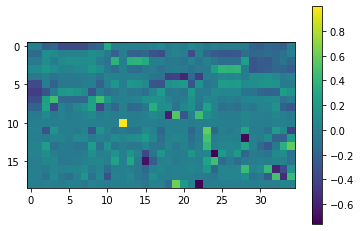

In [205]:
#### import numpy as np
import matplotlib.pyplot as plt

plt.imshow(eigen_vectors)
plt.colorbar()
plt.show()

In [3]:
# read buyer dataste
crime = pd.read_csv("crime.csv")
crimedata = agg_dataset()
crimedata.load_seller(crime, ["DBN"], "crime")
crimedata.compute_agg(True)

esl = pd.read_csv("esl.csv")
esldata = agg_dataset()
esldata.load_seller(esl, [["DBN","Grade"]], "esl")
esldata.compute_agg(True)

ap = pd.read_csv("ap.csv")
apdata = agg_dataset()
apdata.load_seller(ap, ["DBN"], "ap")
apdata.compute_agg(True)

survey = pd.read_csv("2013_NYC_School_Survey.csv")
surveydata = agg_dataset()
surveydata.load_seller(survey, ["DBN"], "survey")
surveydata.compute_agg(True)

base = pd.read_csv("base.csv")
basedata = agg_dataset()
basedata.load_seller(base, ["DBN"], "base")
basedata.compute_agg(True)

disc = pd.read_csv("disc.csv")
discdata = agg_dataset()
discdata.load_seller(disc, ["DBN"], "disc")
discdata.compute_agg(True)

math = pd.read_csv("math.csv")
mathdata = agg_dataset()
mathdata.load_seller(math, [["DBN","Grade"]], "math")
mathdata.compute_agg(True)

oss = pd.read_csv("oss.csv")
ossdata = agg_dataset()
ossdata.load_seller(oss, ["DBN"], "oss")
ossdata.compute_agg(True)

pe = pd.read_csv("pe.csv")
pedata = agg_dataset()
pedata.load_seller(pe, ["DBN"], "pe")
pedata.compute_agg(True)

s2tr = pd.read_csv("s2tr.csv")
s2trdata = agg_dataset()
s2trdata.load_seller(s2tr, ["DBN"], "s2tr")
s2trdata.compute_agg(True)

sat = pd.read_csv("sat.csv")
satdata = agg_dataset()
satdata.load_seller(sat, ["DBN"], "sat")
satdata.compute_agg(True)

pro = pd.read_csv("Schools_Progress_Report_2012-2013.csv")
prodata = agg_dataset()
prodata.load_seller(pro, ["DBN"], "pro")
prodata.compute_agg(True)


spy = pd.read_csv("spy.csv")
spydata = agg_dataset()
spydata.load_seller(spy, ["Year"], "spy")
spydata.compute_agg(True)

transfer = pd.read_csv("transfer.csv")
transferdata = agg_dataset()
transferdata.load_seller(transfer, ["DBN"], "transfer")
transferdata.compute_agg(True)

yabc = pd.read_csv("yabc.csv")
yabcdata = agg_dataset()
yabcdata.load_seller(yabc, ["DBN"], "yabc")
yabcdata.compute_agg(True)

dm1 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.22rr-ujq3")
dm1data = agg_dataset()
dm1data.load_seller(dm1, ["DBN"], "dm1")
dm1data.compute_agg(True)

dm2 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.25aa-q86c")
dm2data = agg_dataset()
dm2data.load_seller(dm2, ["DBN"], "dm2")
dm2data.compute_agg(True)

dm3 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29bv-qqsy")
dm3data = agg_dataset()
dm3data.load_seller(dm3, ["DBN"], "dm3")
dm3data.compute_agg(True)

dm4 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.29ry-u5bf")
dm4data = agg_dataset()
dm4data.load_seller(dm4, ["DBN"], "dm4")
dm4data.compute_agg(True)

dm5 = pd.read_csv("other/datamart.socrata.data-cityofnewyork-us.43qc-8vv8")
dm5data = agg_dataset()
dm5data.load_seller(dm5, [["DBN","Grade"]], "dm5")
dm5data.compute_agg(True)

/home/jupyter/arda/arda-datasets/school/datamarket.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:c'] = 1
/home/jupyter/arda/arda-datasets/school/datamarket.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['cov:Q:' + tablename + ":" + attributes[i] + ","+ tablename + ":" + attributes[j]] = self.data[attributes[i]] * self.data[attributes[j]]
/home/jupyter/arda/arda-datasets/school/datamarket.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [5]:
%%time
sellers = [(crimedata, "DBN"), (apdata, "DBN"), (surveydata, "DBN"), 
           (basedata, "DBN"), (discdata, "DBN"), (mathdata, ("DBN","Grade")), 
           (ossdata, "DBN"), (pedata, "DBN"), (s2trdata, "DBN"), 
           (satdata, "DBN"), (prodata, "DBN"), (spydata, "Year"),
           (transferdata, "DBN"), (yabcdata, "DBN"), (dm1data, "DBN"),
           (dm2data, "DBN"), (dm3data, "DBN"), (dm4data, "DBN"), (dm5data, ("DBN","Grade"))]

# find m best datasets to augment
bought = set()
m = 6

for i in range(m):
    best_seller = None
    best_seller_attrs = []
    best_dimension = None
    best_r2 = 0

    for sellerdata, dimension in sellers:
        # check if current seller has been bought
        if sellerdata.name in bought:
            continue

        # find the attributes and r2 of augmenting
        cur_atts, final_r2 = select_features(gender_train, gender_test, sellerdata, dimension,10)

        if final_r2 > best_r2:
            best_seller = sellerdata
            best_dimension = dimension
            best_seller_attrs = cur_atts
            best_r2 = final_r2


    print(best_seller.name, best_seller_attrs, best_r2)
    
    # absorb the best seller
    gender_train.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
    gender_test.absorb(best_seller, best_dimension, [x for x in best_seller_attrs if x in best_seller.X])
    bought.add(best_seller.name)

/home/jupyter/arda/arda-datasets/school/datamarket.py:290: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  join = join.drop('cov:c_y', 1)
/home/jupyter/arda/arda-datasets/school/datamarket.py:317: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  join['cov:Q:' + att2 + "," + att1] = join['cov:s:' + att2] * join['cov:s:' + att1]/join['cov:c']


math ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'math:cbrNumber Tested'] 0.6217600975927439
dm5 ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'math:cbrNumber Tested', 'dm5:sqNum Level 4', 'dm5:cbrPct Level 3 and 4', 'dm5:Number Tested'] 0.7810190038694833
sat ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'sat:logWriting Mean', 'sat:Mathematics Mean', 'sat:cbrNumber of Test Takers', 'sat:cbrCritical Reading Mean', 'sat:logCritical Reading Mean', 'dm5:cbrPct Level 3 and 4'] 0.7412042773002985
ap ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'ap:sqTotal Exams Taken', 'gender:Number Tested', 'sat:cbrNumber of Test Takers'] 0.7611116405848909
yabc ['math:Level 4 %', 'math:cbrLevel 1 %', 'math:logYear', 'math:cbrYear', 'ap:sqTotal Exams Taken', 'gender:Number Tested', 'sat:cbrNumber of Test Takers', 'yabc:sq% Overage', 'yabc:cbrClosing the Achievement Gap Points', 'yabc:Average Math Pro

In [7]:
gender_train.X

['gender:Mean Scale Score',
 'gender:Number Tested',
 'math:Level 4 %',
 'math:cbrLevel 1 %',
 'math:logYear',
 'math:cbrYear',
 'math:cbrNumber Tested',
 'dm5:sqNum Level 4',
 'dm5:cbrPct Level 3 and 4',
 'dm5:Number Tested',
 'sat:logWriting Mean',
 'sat:Mathematics Mean',
 'sat:cbrNumber of Test Takers',
 'sat:cbrCritical Reading Mean',
 'sat:logCritical Reading Mean',
 'ap:sqTotal Exams Taken',
 'yabc:sq% Overage',
 'yabc:cbrClosing the Achievement Gap Points',
 'yabc:Average Math Proficiency',
 'transfer:logAverage English Proficiency']